Common sequence of length 0 found:
()
Common sequence of length 1 found:
('A',)
Common sequence of length 2 found:
('A', 'B')
Common sequence of length 3 found:
('A', 'B', 'Q')
Common sequence of length 4 found:
('A', 'B', 'Q', 'U')
Common sequence of length 5 found:
('A', 'B', 'Q', 'U', 'W')
Common sequence of length 6 found:
('A', 'B', 'Q', 'U', 'W', 'T')
Running time of the complete enumeration algorithm: 0.006979227066040039 seconds
LCS is: ABQUWT, and has length 6
Running time of the dynamic programming algorithm: 0.0 seconds


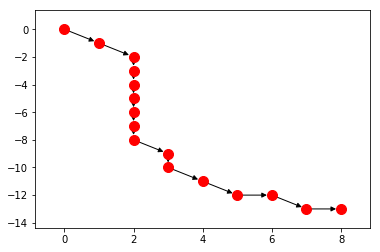

LCS has length 6
Running time of the algorithm: 0.001995086669921875 seconds
ABQUWT


In [11]:
#input S and T are two strings
#outputs the Longest common best sequence

import numpy as np
import networkx as nx
import itertools
import time
import matplotlib.pyplot as plt


#brute force implementation of LCS
def brute_force_LCS(S,T):
    start_time = time.time()
    s = len(S)
    t = len(T)
    n = min(s,t)

    for i in range(n+1):
        #loop through all combinations from s and t
        for set_s in itertools.combinations(S,i):
            for set_t in itertools.combinations(T,i):
                if set_s == set_t:
                    LCS = set_s
                    print("Common sequence of length %s found:" % (i) )
                    print(LCS)
                    break
            else:
                continue
            break
    stop_time=time.time() - start_time
    print("Running time of the complete enumeration algorithm: %s seconds" % (stop_time))

    return LCS

#Dynamic Programming Implementation of LCS
def dp1_LCS(S,T):
    start_time = time.time()
    # find the length of the strings
    s = len(S)
    t = len(T)

    # declaring the array for storing the dp values
    dp_table = np.zeros((s+1,t+1))
    for i in range(s+1):
        for j in range(t+1):
            if i == 0 or j == 0 :
                dp_table[i][j] = 0
            elif S[i-1] == T[j-1]:
                dp_table[i][j] = dp_table[i-1][j-1]+1
            else:
                dp_table[i][j] = max(dp_table[i-1][j] , dp_table[i][j-1])

    #creating LCS
    LCS = ""

# Start from the right-most-bottom-most corner and
# one by one store characters in lcs[]
    i = s
    j = t
    while i > 0 and j > 0:

    # If current character in X[] and Y are same, then
    # current character is part of LCS
        if S[i-1] == T[j-1]:
            LCS = S[i-1] + LCS
            i-=1
            j-=1

    # If not same, then find the larger of two and
    # go in the direction of larger value
        elif dp_table[i-1][j] > dp_table[i][j-1]:
            i-=1
        else:
            j-=1

    stop_time=time.time() - start_time
    #print(dp_table)
    print("LCS is: %s, and has length %d" %(LCS, dp_table[s][t]))
    print("Running time of the dynamic programming algorithm: %s seconds" % (stop_time))
    return LCS


#Dynamic programming implementation without full SxT table generation
def dp2_LCS(S,T):
    start_time = time.time()
# find the length of the strings
    s = len(S)
    t = len(T)
    #first column initialization

    col = np.zeros(t+1)
    col_new = np.zeros(t+1)

    for iter in range(1,s+1):

        for j in range(1,t+1):
            if T[j-1] == S[iter-1]:
                col_new[j] = col[j-1]+1
            else:
                col_new[j] = max(col_new[j-1], col[j])
        col = col_new
        col_new = np.zeros(t+1)


    stop_time=time.time() - start_time
    print("LCS has length %d" %(col[t]))
    print("Running time of fast implentation: %s seconds" % (stop_time))
    

# implementation of LCS which also computes the dependency among entries
# cleanup = 1 if, at each iteration, we remove entries that are no longer useful
    
def dp3_LCS(S,T,savememory,shouldprint):
    start_time = time.time()
# find the length of the strings
    s = len(S)
    t = len(T)
    pos={}

    # each node represents an entry of the table that is active, i.e. contributing to the value of some other entry.
    # we create each node in the first row and columb

    
    D=nx.DiGraph()
    
    for i in range(s+1):
    
        D.add_node((i,0), weight=0)
        pos[(i,0)]=(0,-i)
        
    for i in range(t+1):
        
        D.add_node((0,i), weight =0)
        pos[(0,i)]=(i,0)

        
    for i in range(1,s+1):
        
# We create the table row by row
# We first create row i, connecting each node in the row to the predecessor
        
        for j in range(1,t+1):
        
            if S[i-1] == T[j-1]:
                D.add_node((i,j), weight=1+D.node[(i-1,j-1)]['weight'])
                D.add_edge((i-1,j-1),(i,j))
                
            else:
                if D.node[(i-1,j)]['weight']>D.node[(i,j-1)]['weight']:
                    istar=i-1
                    jstar=j
                    value=D.node[(i-1,j)]['weight']
                else:
                    istar=i
                    jstar=j-1
                    value=D.node[(i,j-1)]['weight']
                
                D.add_node((i,j), weight=value)
                D.add_edge((istar,jstar),(i,j))
                
            pos[(i,j)]=(j,-i)

# If savememory = 1, we eliminate nodes in previous rows that have become useless. This saves memory

        if (savememory):

# create a list of nodes whose outdegree is decreased, and that will be scanned for elimination

            to_be_scanned=[]

# we find nodes in the previous row of 0 outdegree (i.e., their value does not affect anyone in the table), remove them, and add nodes pointing to them to list of nodes to be scanned 

            for j in range(0,t+1):
                to_be_scanned.append((i-1,j))
    
            while len(to_be_scanned)>0:
                f=to_be_scanned[0]
                to_be_scanned.pop(0)
                if D.out_degree(f)==0:
                    for e in D.in_edges(f):
                        (a,b)=e
                        to_be_scanned.append(a)
                    D.remove_node(f)
                    
                    
            
# similarly as above, but for the last row of the matrix            
 
    if (savememory):
        for j in range(0,t):
            to_be_scanned.append((s,j))
    
            while len(to_be_scanned)>0:
                f=to_be_scanned[0]
                to_be_scanned.pop(0)
                if D.out_degree(f)==0:
                    for e in D.in_edges(f):
                        (a,b)=e
                        to_be_scanned.append(a)
                    D.remove_node(f)
                    

 


    stop_time=time.time() - start_time
    
    if (shouldprint):
        nx.draw_networkx_nodes(D,pos,node_size=100)  # prints dependency        
        nx.draw_networkx_edges(D,pos,node_size=100)  # prints dependency        
        plt.show()
    
    print("LCS has length %d" %(D.node[(s,t)]['weight']))
    print("Running time of the algorithm: %s seconds" % (stop_time))
    

# we now compute and print the optimal solution, by backtracking from the last node

    optimal_string=[]
    
    e=(s,t)
    while (D.in_edges(e)):
        (a,b)=e
        adj=D.in_edges(e)
        for f in adj:
            (c,d)=f[0]
            if (c==a-1 and d==b-1):
                optimal_string.insert(0, S[a-1])
            e=(c,d)
            
            
    optimal_string= ''.join(optimal_string)
    
    print(optimal_string)
 


S = "ABCAAACDQEUWT"
T = "ABQUWRTW"
brute_force_LCS(S,T)
dp1_LCS(S,T)
dp3_LCS(S,T,1,1)

    

In [12]:

#read in first dna
f = open('dna_virus1.txt','r')
seq=f.readlines()
f.close()

seq1 = [x[:-1] for x in seq]
dna1=""
for x in seq1:
    dna1 = dna1 + x
print(len(dna1))
#read in second dna
f = open('dna_virus2.txt', 'r')
seq=f.readlines()
f.close()

seq1 = [x[:-1] for x in seq]
dna2=""
for x in seq1:
    dna2 = dna2 + x
print(len(dna2))

LCS1=dp1_LCS(dna1,dna2)
dp2_LCS(dna1,dna2)
dp3_LCS(dna1,dna2,1,0)



3048
3182
7438
LCS is: TCCAAATTTCAAAATCGCAAGATCCAGAGTGGGGCTTATTTTCTGGTGGGGGAAAGAAACGTTCCACTATTCTCTTATGTCAACCTGAGATTGGGGACCCCAACATGAGAATCACTAGACCAATCCGTGTTCAGGGCGACAAAACTCAAATCGAAAACTCGTGGACTTCCTAAAGGGAACACGTTGTCTTGGAAAATTCAGTCCCAACCTCTCACCCCAACTCCTCCCCACCCGGTTTCGGGGGTTCGGGACCCTCCACCTGGAGTATCTCTGGTCGCATAAGTTGGGGTTATCAGGATTCAAAAAGGATGGAATCATCCTGAAGGAAAGTACCCTCCACAAACCTTGAGGAAATTATGATTCCATCTAGGTTGGAAAATTTGATCCAGCCTTTTGGCCAGACTTCCATTTTAGGTGGGGTTACCCAAAATATTGTACCAACAACATGAGCCTTTAGGAATTTTTTTGTCTTGGGATCTTTAACTAACAAAACATGTTACTTTAAAGGGTATCTTGGAAGTACCTTGCCCAAGAACAATATCCAAAGTAGAAAATCATGGCCTATGATGGAAAGTATGTCAAAAATTGCTGTGCTCCCCCTTCATGTGGTTTCCTCAATGCTTTATGCATGTACACAAGAGTTTACTTTCTCCAACTTACAAGGCCTTTTGGTACAATCCGAACCTACCCCGTTGCCCGGAAGGCCAGGTTGGAATTCGCCAACCAGGCGCGGAGGGCATAGGATCGGGAACTCGCTCCTCGCCTCCAACCAACCCACCCTGTTGCTGAAGGCGGAGAACTTTCGGGCGATACTTGGTCCCGCAAATACAGTATCAGGTGCAGGTTCCCAACTATCCTGGGGGATCTACTTGGCCTAATGGATTCTGGTGGATTTTTCTTGTTGTTCGAACACGGGGCGACTTTTGGACTCCCGTTTTCCAGGACTGTTTCGTTTCCAGTATGGAGCCACCTCCCCA

In [10]:
#read in first dna
f = open('chromosome1.txt','r')
seq=f.readlines()
f.close()

seq1 = [x[:-1] for x in seq]
chrom1=""
for x in seq1:
    chrom1 = chrom1 + x
print(len(chrom1))
#read in second dna
f = open('chromosome2.txt', 'r')
seq=f.readlines()
f.close()

seq1 = [x[:-1] for x in seq]
chrom2=""
for x in seq1:
    chrom2 = chrom2 + x
print(len(chrom2))

chrom1 = chrom1[0:35000]
chrom2 = chrom2[0:35000]
dp2_LCS(chrom1,chrom2)

chrom1=chrom1[0:10000]
chrom2=chrom2[0:10000]

LCS1=dp1_LCS(chrom1,chrom2)


237968
470899
LCS has length 22392
Running time of fast implentation: 718.5506858825684 seconds
10000
10000
LCS is: TAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCAACCCTAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCTAACCCTAACCCCTAACCCAACCCTAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCCAACCCCAACCCAACCCCAACCCAACCCTAACCCTACCCTACCCTACCCAACCCAACCCAACCCACCCCACCCCAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTAACCCTAACCTCGCGGTACCCTCAGCCGGCCCGCCCGCGGGCTGACCTGAGGAGAATGTGCTCGCCTTAGGTCCACCGTTGTGCAGAAAACGCAGCTCCGCCTCGCGGTGCCTCCGGGTCTGTGTGAGAGAACGCACTCCTTGCAAAGGCCCGCGCCGCGCAGGCGCAGAGAGGCGCCCGCGCCGCGCAGGCGCAGAGAGGCGCCCGCGCCGCGCAGGCGCAGAGAGGCGCCCGCGCCGCGCAGGCGCAGAGAGGCGCCCGCGCCGCGCAGGCGCAGAGAGGCGCCCGCGCCGCGCAGGCGCAGAACGCAGCGCGCGGGGGGAGGCGGGCGCAGGCGCAGAGAGGCGCCCGCGCCGCGCAGGCGCAGAGACGCACCGCGCCGGGGGGAGGCGGGCGCAGGCGCAAAGGCGCACCGCGCCGCGCAGGCGCACACAGCAGCGCGCCAGGGGGGAGGCGGGCGCAGGC